<a href="https://colab.research.google.com/github/DigitalHugManitees/DH_Topic_Workshop/blob/main/OCR_and_LDA_superbook_v6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OCR and LDA for pdf files.
This super notebook is for a concise analysis of pdf files. 




In [1]:

"""
1. sign into your google account
2. save a copy of this notebook to your google drive as your own
3. run cell linking to your google drive

"""

#mount google drive here
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os 

# Set your working directory to a folder in your Google Drive. 
# the base Google Drive directory
root_dir = "/content/drive/My Drive/"
# choose where you want your project files to be saved
project_folder = "Colab Notebooks/OCR_Project_Folder/"

def create_and_set_working_directory(project_folder):
  # check if your project folder exists. if not, it will be created.
  if os.path.isdir(root_dir + project_folder) == False:
    os.mkdir(root_dir + project_folder)
    print(root_dir + project_folder + ' did not exist but was created.')

  # change the OS to use your project folder as the working directory
  os.chdir(root_dir + project_folder)

  # show me the current working directory

  print('\nYour working directory was changed to ' + root_dir + project_folder)

create_and_set_working_directory(project_folder)

print()
print('Move your pdf files to the working directory: ' + project_folder)

Mounted at /content/drive

Your working directory was changed to /content/drive/My Drive/Colab Notebooks/OCR_Project_Folder/

Move your pdf files to the working directory: Colab Notebooks/OCR_Project_Folder/


In [2]:
"""
Install dependencies and libraries
"""

!apt install tesseract-ocr
!apt install libtesseract-dev
!apt-get install poppler-utils
!pip install pdf2image
!pip install Pillow
!pip install pytesseract

# Import libraries
import pytesseract
from PIL import ImageEnhance, ImageFilter, Image
import sys
from pdf2image import convert_from_path
import os
from google.colab import files
from tqdm import tqdm

#sometimes poppler install fails - this line should update everything
!apt-get update 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2build2).
0 upgraded, 0 newly installed, 0 to remove and 47 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libtesseract-dev is already the newest version (4.1.1-2build2).
0 upgraded, 0 newly installed, 0 to remove and 47 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
poppler-utils is already the newest version (0.86.1-0ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 47 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Hit:1 https://cloud.r-project.org

In [3]:
"""
create function to run in a loop
through the pdf list

"""
def OsCaRizer(pdf_file):

  # Path of the pdf
  #PDF_file = '/content/drive/MyDrive/Colab Notebooks/OCR_Project_Folder/dalhousiegazette_volume54_issue19_november_29_1922.pdf'
  PDF_file = path_of_the_directory + "/" + pdf_file

  #suppress warnings about image size from PIL
  Image.MAX_IMAGE_PIXELS = None   # disables the warning
    
  # Store all the pages of the PDF in a variable
  pages = convert_from_path(PDF_file, 500)
    
  # Counter to store images of each page of PDF to image
  image_counter = 1
    
  # Iterate through all the pages stored above
  for page in pages:
    
      # Declaring filename for each page of PDF as JPG
      # For each page, filename will be:
      # PDF page 1 -> page_1.jpg
      # PDF page 2 -> page_2.jpg
      # PDF page 3 -> page_3.jpg
      # ....
      # PDF page n -> page_n.jpg
      filename = "page_"+str(image_counter)+".jpg"
        
      # Save the image of the page in system
      page.save(filename, 'JPEG')
    
      # Increment the counter to update filename
      image_counter = image_counter + 1
  """
  process the image files to text
  """
  #suppress warnings about image size from PIL
  Image.MAX_IMAGE_PIXELS = None   # disables the warning

  # Variable to get count of total number of pages
  filelimit = image_counter-1
    
  # Creating a text file to write the output
  outfile = ((pdf_file.rsplit( ".", 1)[0]) + '.txt')
    
  # Open the file in append mode so that 
  # All contents of all images are added to the same file
  f = open(outfile, "a")
    
  # Iterate from 1 to total number of pages
  for i in (range(1, filelimit + 1)):
    
      # Set filename to recognize text from
      # These files will be:
      # page_1.jpg
      # page_2.jpg
      # ....
      # page_n.jpg
      filename = "page_"+str(i)+".jpg"
            
      # Recognize the text as string in image using pytesserct
      text = str(((pytesseract.image_to_string(Image.open(filename)))))
    
      # The recognized text is stored in variable text
      # Any string processing may be applied on text
      # Here, basic formatting has been done:
      # In many PDFs, at line ending, if a word can't
      # be written fully, a 'hyphen' is added.
      # The rest of the word is written in the next line.
      # To remove this, we replace every '-\n' to ''.
      text = text.replace('-\n', '')    
    
      # Finally, write the processed text to the file.
      f.write(text)
    
  # Close the file after writing all the text.
  f.close()
  """
  clean out page image files before next instance of loop
  """

  files = os.listdir(path_of_the_directory)
  for f in files:
    if not os.path.isdir(f) and "page" in f:
      os.remove(f)

  print('done - you should see a .txt file named after your .pdf file in your working directory')


In [4]:
"""
Step 3: gather the PDF files and create the OsCaRizer function

This should find all PDF files in working dir. 
HOWEVER, it will not find those nested in subdirectories
"""
path_of_the_directory = os.getcwd()
ext = ('.pdf')
pdf_list = []
for files in os.listdir(path_of_the_directory):
    if files.endswith(ext):
        print(files)
        pdf_list.append(files)

    else:
        continue
print('done - move on to next cell')



dalhousiegazette_volume120_issue1_september_10_1987 copy.pdf
dalhousiegazette_volume120_issue2_september_17_1987.pdf
dalhousiegazette_volume120_issue3_september_24_1987.pdf
dalhousiegazette_volume120_issue4_october_1_1987.pdf
dalhousiegazette_volume120_issue5_october_8_1987.pdf
dalhousiegazette_volume120_issue8_november_5_1987.pdf
dalhousiegazette_volume120_issue9_november_12_1987.pdf
dalhousiegazette_volume120_issue7_october_29_1987.pdf
dalhousiegazette_volume120_issue11_november_26_1987.pdf
done - move on to next cell


In [ ]:
"""
Step 4: Runs the OsCaRizer function.
"""

for k in tqdm(range(len(pdf_list))):
    pdf_file = pdf_list[k]
    OsCaRizer(pdf_file)
    print('the file ' + pdf_file + ' is complete')


 11%|█         | 1/9 [00:55<07:27, 55.89s/it]

done - you should see a .txt file named after your .pdf file in your working directory
the file dalhousiegazette_volume120_issue1_september_10_1987 copy.pdf is complete


 22%|██▏       | 2/9 [01:46<06:09, 52.79s/it]

done - you should see a .txt file named after your .pdf file in your working directory
the file dalhousiegazette_volume120_issue2_september_17_1987.pdf is complete


 33%|███▎      | 3/9 [02:49<05:43, 57.24s/it]

done - you should see a .txt file named after your .pdf file in your working directory
the file dalhousiegazette_volume120_issue3_september_24_1987.pdf is complete


 44%|████▍     | 4/9 [03:45<04:44, 56.80s/it]

done - you should see a .txt file named after your .pdf file in your working directory
the file dalhousiegazette_volume120_issue4_october_1_1987.pdf is complete


 56%|█████▌    | 5/9 [04:15<03:09, 47.36s/it]

done - you should see a .txt file named after your .pdf file in your working directory
the file dalhousiegazette_volume120_issue5_october_8_1987.pdf is complete


 67%|██████▋   | 6/9 [05:07<02:26, 48.77s/it]

done - you should see a .txt file named after your .pdf file in your working directory
the file dalhousiegazette_volume120_issue8_november_5_1987.pdf is complete


 78%|███████▊  | 7/9 [05:48<01:32, 46.33s/it]

done - you should see a .txt file named after your .pdf file in your working directory
the file dalhousiegazette_volume120_issue9_november_12_1987.pdf is complete


 89%|████████▉ | 8/9 [06:20<00:41, 41.74s/it]

done - you should see a .txt file named after your .pdf file in your working directory
the file dalhousiegazette_volume120_issue7_october_29_1987.pdf is complete


100%|██████████| 9/9 [13:50<00:00, 92.31s/it] 

done - you should see a .txt file named after your .pdf file in your working directory
the file dalhousiegazette_volume120_issue11_november_26_1987.pdf is complete


# LDA using Spacey and Gensim 


In [5]:
#**************************************
# Install libraries and dependencies
#*************************************

# Install libraries and dependencies


!pip install pyLDAvis -qq 
!pip install -qq -U gensim
!pip install spacy -qq
!pip install matplotlib -qq
!pip install seaborn -qq
!python -m spacy download en_core_web_md -qq
!pip install fsspec

!pip install gensim==3.8.3

import gensim #new

import warnings
warnings.filterwarnings('ignore') # this ignores warnings
# Import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import spacy
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()# Visualise inside a notebook
import en_core_web_md
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel
import itertools
import os
from google.colab import files
from tqdm import tqdm

from pathlib import Path
import csv
import itertools

pd.set_option('display.max_columns', None) # this allows you see all columns in pandas

# Our spaCy model:
nlp = en_core_web_md.load() # this will be used to train the algorithm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 63.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 KB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-02-01 08:24:41.097296: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 14.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via s

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable
/usr/local/lib/python3.8/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Mapping


In [127]:
"""
Import your data

This should find all .txt files in working dir. 
HOWEVER, it will not find those nested in subdirectories
"""

path_of_the_directory = os.getcwd()
ext = ('.txt')

#define empty df
reports = pd.DataFrame(columns=['file_name','publication_year','content'])
txt_list = []
txt_file_name = []
year_list = []
content_list = []
#get all txt files in the Drive 
for files in os.listdir(path_of_the_directory):

  if files.endswith(ext):
      print(files)
      txt_list.append(files)

      # Creating a text file to write the output
      file_name = ((files.rsplit( ".", 1)[0]))
      txt_file_name.append(file_name)

      #get year
      year_value = ((file_name.rsplit( "_")[-1]))
      year_list.append(year_value)

      #read files into list
      temp_read = Path(files).read_text()
      content_list.append(temp_read)

  else:
      continue
#use to gather lists in a temp df
temp_df = pd.DataFrame.from_records(itertools.zip_longest(txt_file_name, year_list, content_list), columns=['file_name','publication_year','content'])

# take temp_df and concat with perm_df
reports = pd.concat([reports, temp_df], ignore_index=True)

# change this to match your content column name. 
reports['content'] = reports['content'].astype(str)
print()
print('The following is our collected data')
reports.head()

dalhousiegazette_volume120_issue1_september_10_1987 copy.txt
dalhousiegazette_volume120_issue2_september_17_1987.txt
dalhousiegazette_volume120_issue3_september_24_1987.txt
dalhousiegazette_volume120_issue4_october_1_1987.txt
dalhousiegazette_volume120_issue5_october_8_1987.txt
dalhousiegazette_volume120_issue8_november_5_1987.txt
dalhousiegazette_volume120_issue9_november_12_1987.txt
dalhousiegazette_volume120_issue7_october_29_1987.txt
dalhousiegazette_volume120_issue11_november_26_1987.txt

The following is our collected data


,file_name,publication_year,content
0,dalhousiegazette_volume120_issue1_september_10...,1987 copy,by Michelle Lalonde\nCanadian University Press...
1,dalhousiegazette_volume120_issue2_september_17...,1987,\n\n \n\nMUSIC FROM A\nSPOKESMAN—\n\nA glimps...
2,dalhousiegazette_volume120_issue3_september_24...,1987,LEANING\nLEFT\n\nBY CHRIS LAWSON\nREPRINTED FR...
3,dalhousiegazette_volume120_issue4_october_1_1987,1987,A\nRINT\nCANA\n\nM\nT\n\ney\n\n0\nE\n\nR\n\nL\...
4,dalhousiegazette_volume120_issue5_october_8_1987,1987,\n\n \n\nCanada\ncompetes\nIn\n\nthe\n\ngloba...


In [128]:
"""
set number of n-grams here
"""

from nltk import ngrams

def compile_ngrams(text, number_of_n=3, include_unigrams=True):
  ngram_list = []
  # number_of_n controls up to how many n we build an ngram for
  # 2 being bigrams, 3 being trigrams, ect.
  for n in range(number_of_n):
    if n == 0 and not include_unigrams:
      continue
    for ngram in ngrams(text.split(), n + 1):
      ngram_list.append(' '.join(ngram))
  return ngram_list

"""this is a test to make sure the function works"""
print(compile_ngrams("There was a cloud computing conference about big data and natural language processing"))

['There', 'was', 'a', 'cloud', 'computing', 'conference', 'about', 'big', 'data', 'and', 'natural', 'language', 'processing', 'There was', 'was a', 'a cloud', 'cloud computing', 'computing conference', 'conference about', 'about big', 'big data', 'data and', 'and natural', 'natural language', 'language processing', 'There was a', 'was a cloud', 'a cloud computing', 'cloud computing conference', 'computing conference about', 'conference about big', 'about big data', 'big data and', 'data and natural', 'and natural language', 'natural language processing']


In [131]:
"""
data cleaning, setting controlled vocabulary and tokenizing
"""

# Tags I want to remove from the text
removal= ['ADV','PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE', 'NUM', 'SYM']

# Words I really care about that should certainly be in the dictionary
author_assigned_keywords = ["nuclear weapon", "billy bragg"] #place anything in here in quotes

tokens = []
for summary in nlp.pipe(reports['content']):
   # build up tokens here
   # using the authors heuristics:
   unigrams = [token.lemma_.lower() for token in summary if token.pos_ not in removal and not token.is_stop and token.is_alpha]
   # using "author assigned keywords" by checking if they are in the text
   proj_tok += [keyword for keyword in author_assigned_keywords if keyword in summary.text]
   # we can use the proj_tok clean text as the "paragraph"
   proj_tok = compile_ngrams(" ".join(unigrams), number_of_n=2, include_unigrams=True)


   tokens.append(proj_tok)


# Add tokens to new column
reports['tokens'] = tokens 

# Create dictionary
# Apply the Dictionary Object from Gensim, which maps each word to their unique ID:
dictionary = Dictionary(reports['tokens'])
print(dictionary.token2id)

#see the dataframe with a new column called tokens
reports

{'academic': 0, 'academic society': 1, 'accept': 2, 'accept applicant': 3, 'accord': 4, 'accord ministry': 5, 'accord yanase': 6, 'active': 7, 'active lobby': 8, 'active threat': 9, 'active year': 10, 'activity': 11, 'activity study': 12, 'adapt': 13, 'adapt need': 14, 'add': 15, 'add good': 16, 'administra': 17, 'administra tuition': 18, 'afford': 19, 'afford say': 20, 'akiko': 21, 'akiko shinoda': 22, 'allowance': 23, 'allowance cr': 24, 'alternate': 25, 'alternate row': 26, 'annual': 27, 'annual spring': 28, 'anthem': 29, 'anthem japanese': 30, 'anti': 31, 'anti government': 32, 'apolitical': 33, 'apolitical attitude': 34, 'apparent': 35, 'apparent westerner': 36, 'applicant': 37, 'applicant institution': 38, 'approach': 39, 'approach japanese': 40, 'area': 41, 'area system': 42, 'arise': 43, 'arise curriculum': 44, 'ask': 45, 'ask send': 46, 'aspire': 47, 'aspire japan': 48, 'assert': 49, 'assert identity': 50, 'associate': 51, 'associate people': 52, 'attend': 53, 'attend employer

,file_name,publication_year,content,tokens
0,dalhousiegazette_volume120_issue1_september_10...,1987 copy,by Michelle Lalonde\nCanadian University Press...,"[michelle, lalonde, canadian, university, pres..."
1,dalhousiegazette_volume120_issue2_september_17...,1987,\n\n \n\nMUSIC FROM A\nSPOKESMAN—\n\nA glimps...,"[music, spokesman, glimpse, billy, bragg, e, d..."
2,dalhousiegazette_volume120_issue3_september_24...,1987,LEANING\nLEFT\n\nBY CHRIS LAWSON\nREPRINTED FR...,"[leaning, left, chris, lawson, reprinted, mcgi..."
3,dalhousiegazette_volume120_issue4_october_1_1987,1987,A\nRINT\nCANA\n\nM\nT\n\ney\n\n0\nE\n\nR\n\nL\...,"[rint, cana, m, t, ey, e, r, l, h, h, e, e, fr..."
4,dalhousiegazette_volume120_issue5_october_8_1987,1987,\n\n \n\nCanada\ncompetes\nIn\n\nthe\n\ngloba...,"[canada, compete, global, arm, bazaar, s, iran..."
5,dalhousiegazette_volume120_issue8_november_5_1987,1987,NTESIN\n\nby Beth Ryan\nNational Features Writ...,"[ntesin, beth, ryan, national, features, write..."
6,dalhousiegazette_volume120_issue9_november_12_...,1987,\n \n \n \n \n \n \n \n\n \n\n \n\na...,"[an, ss, page, veteran, bombing, mission, euro..."
7,dalhousiegazette_volume120_issue7_october_29_1987,1987,\n\n \n\nStudents? What students?\n\nT he foc...,"[student, student, t, focus, postsecondary, ed..."
8,dalhousiegazette_volume120_issue11_november_26...,1987,\n\n \n \n\nStill an f-word:\nFeminism\n\nMy ...,"[f, word, feminism, mother, feminist, mean, wa..."


In [134]:
"""
set number of topics and run LDA
"""

# Create corpus
corpus = [dictionary.doc2bow(doc) for doc in reports['tokens']]

#set num_topics here
# Optimal LDA model building
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=100, num_topics=9, workers = 4, passes=100)

# Print topics
lda_model.print_topics(-1)

# Where does a text belong to
lda_model[corpus][0]
reports['content'][0]

# Visualize topics
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
try:
    pyLDAvis.display(lda_display)
except TypeError:
    raise TypeError("Too many topics. Try lowering the value of num_topics=") from None

# Save the report
pyLDAvis.save_html(lda_display, 'index.html')



In [51]:
"""
Print topics
"""
# Where does a text belong to
temp_clusters = []
for i in range(len(lda_model[corpus])):
  #print(lda_model[corpus][i][0])
  temp_clusters.append(lda_model[corpus][i][0])

df2 = pd.DataFrame(temp_clusters, columns=['cluster', 'score'])

#let's see those clusters and some tokens
for i in range(lda_model.num_topics):
  print ("cluster: " + str(i+1) + "  " + str( lda_model.print_topic(i)))

#create an ordered list and join to reports
reports = pd.concat([reports,df2], axis=1)

#drop the content column as you already have this in the originall l.txt file
reports = reports.drop(columns='content')

#reposition cluster and score
reports = reports[['file_name', 'publication_year', 'cluster', 'score', 'tokens']]

# correct cluster number as ordinal
reports['cluster'] = reports['cluster']+1

#export as excel file
reports.to_csv("LDA_with_clusters.csv", index=False) 

#let's see it!
reports


cluster: 1  0.003*"safe sex" + 0.002*"gay people" + 0.002*"mcneil say" + 0.002*"gay disease" + 0.002*"aids gay" + 0.001*"student union" + 0.001*"year student" + 0.001*"university student" + 0.001*"contract aids" + 0.001*"people think"
cluster: 2  0.004*"south africa" + 0.002*"national universities" + 0.002*"universities week" + 0.001*"private sector" + 0.001*"national forum" + 0.001*"sector university" + 0.001*"funding problem" + 0.001*"south african" + 0.001*"academic cultural" + 0.001*"leader ns"
cluster: 3  0.001*"nova scotia" + 0.001*"dalhousie gazette" + 0.001*"darvesh say" + 0.001*"rm sub" + 0.001*"innu people" + 0.001*"dalhousie university" + 0.001*"gazette thursday" + 0.001*"thursday november" + 0.001*"dal sub" + 0.001*"man woman"
cluster: 4  0.004*"academic freedom" + 0.002*"political science" + 0.002*"science department" + 0.002*"rights commission" + 0.002*"human rights" + 0.002*"gibson report" + 0.002*"mandel case" + 0.002*"tenure track" + 0.002*"track position" + 0.002*"cau

,file_name,publication_year,cluster,score,tokens
0,dalhousiegazette_volume120_issue1_september_10...,1987 copy,5,0.999117,"[michelle lalonde, lalonde canadian, canadian ..."
1,dalhousiegazette_volume120_issue2_september_17...,1987,6,0.999045,"[music spokesman, spokesman glimpse, glimpse b..."
2,dalhousiegazette_volume120_issue3_september_24...,1987,4,0.999089,"[leaning left, left chris, chris lawson, lawso..."
3,dalhousiegazette_volume120_issue4_october_1_1987,1987,1,0.999001,"[rint cana, cana m, m t, t ey, ey e, e r, r l,..."
4,dalhousiegazette_volume120_issue5_october_8_1987,1987,7,0.998573,"[canada compete, compete global, global arm, a..."
5,dalhousiegazette_volume120_issue8_november_5_1987,1987,3,0.998697,"[ntesin beth, beth ryan, ryan national, nation..."
6,dalhousiegazette_volume120_issue9_november_12_...,1987,7,0.998940,"[an ss, ss page, page veteran, veteran bombing..."
7,dalhousiegazette_volume120_issue7_october_29_1987,1987,2,0.998090,"[student student, student t, t focus, focus po..."
8,dalhousiegazette_volume120_issue11_november_26...,1987,3,0.999869,"[f word, word feminism, feminism mother, mothe..."


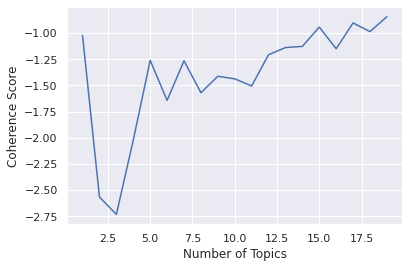

In [ ]:
"""
coherence tests
"""
# Coherence score using C_umass:
topics = []
score = []
for i in range(1,20,1):
    lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
    cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    topics.append(i)
    score.append(cm.get_coherence())
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()
